In [19]:
'''
CISC 453 PROJECT 
'''
from Snake import SnakeGame
import numpy as np
import random
import time
import operator
import matplotlib.pyplot as plt


In [41]:
#Functions for the algorithms 
def choose_action(epsilon,s,Q):
    #epsilon greedy
    if (random.uniform(0,1) > epsilon):
        #exploit
        a = np.argmax(Q[s])
        return a
    else:
        #explore
        a = random.randint(0,3)
        return a

def get_path(Q,s,grid_size):
    #prints out the path 
    length_count = []
    count = 0
    game = SnakeGame(grid_size[0], grid_size[1])
    s = game.calcStateNum()
    stop = False

    while stop != True:
        count+=1
        a = np.argmax(Q[s])
        new_s, r, stop, length = game.makeMove(a)
        s = new_s

        if count >10000:
            #print('count_stopped')
            stop = True
    print('total length',length)

def evaluateScore(Q, boardDim, epoch):
    cutoff = 1000  # X moves without increasing score will cut off this game run
    scores = []
    # we will run the game epoch amount of times and then get the average and max 
    for _ in range(epoch):
        game = SnakeGame(boardDim[0], boardDim[1])
        s = game.calcStateNum()
        
        score = 0
        old_score = 0
        stop = False
        moveCounter = 0
        while stop != True:
            a = np.argmax(Q[s])
            s, r, stop, score = game.makeMove(a)
            #stop the game if score does not improve n amount of times.
            if score == old_score:
                moveCounter += 1
            else:
                old_score = score
                moveCounter = 0
            if moveCounter >= cutoff:
                # stuck going back and forth
                break
        scores.append(score)
    return np.average(scores), scores

def plot_results(x_axis, result, label):
    # Plots results using matplotlib.pyplot
    plt.plot(x_axis, result, label = label)
    plt.xlabel('Num. episodes')
    plt.ylabel('Score')
    plt.ylim(0)
    plt.title('Score per episode')
    plt.legend()
    plt.show()


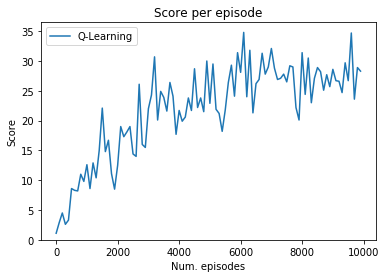

avergae score is 28.76
high score is 57
The running time was 65.82490992546082


In [42]:
def Q_learning(episodes,epsilon,alpha,gamma,grid_size):
    #256 possible states (state represented as 8 bit boolean list), 4 possible actions
    Q = np.zeros((2**8, 4)) 
    start = time.time()
    x_axis = []
    results = []
    for i in range(episodes):
        #SnakeGame uses arguments width, height. It also randomizes the food location while starting location is the same
        game = SnakeGame(grid_size[0], grid_size[1])
        #starting state. It is always middle of the grid
        s = game.calcStateNum()
        stop = False
        while stop != True:
            a = choose_action(epsilon,s,Q)
            #returns next state, reward, stop(boolean if game is over), and length of snake
            next_s, r, stop, length = game.makeMove(a)
            best_a = np.argmax(Q[next_s])
            Q[s][a] = Q[s][a] + alpha*(r + gamma*Q[next_s][best_a] - Q[s][a])
            s = next_s
        #Evaluate performance once every 100 turns for complexity sake
        if i % 100 == 0:
            x_axis.append(i)
            results.append(evaluateScore(Q, grid_size, 10)[0])
            
    score = evaluateScore(Q, grid_size, 300)
    high_score = max(score[1])
    plot_results(x_axis, results, "Q-Learning")
    print('average score is',score[0])
    print('high score is',high_score)
    print("The running time was", time.time() - start)
    
Q_learning(episodes = 10000,epsilon= 0.2,alpha= 0.4,gamma = 0.9,grid_size = [20,20])


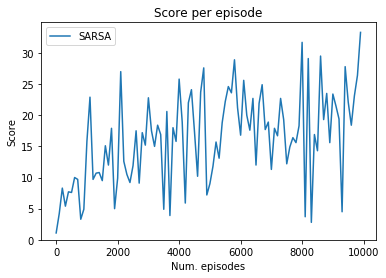

avergae score is 28.766666666666666
high score is 60
The running time was 57.57810354232788


In [22]:
def SARSA(episodes,epsilon,alpha,gamma,grid_size):
    #256 possible states (state represented as 8 bit boolean list), 4 possible actions
    Q = np.zeros((2**8, 4))
    start = time.time()
    x_axis = []
    results = []
    for i in range(episodes):
        #SnakeGame uses arguments width, height. It also randomizes the food location while starting location is the same
        game = SnakeGame(grid_size[0], grid_size[1])
        s = game.calcStateNum()
        stop = False
        a = choose_action(epsilon,s,Q)

        while stop != True:
            next_s, r, stop, length = game.makeMove(a)
            next_a = choose_action(epsilon,next_s,Q)
            Q[s][a] = Q[s][a] + alpha*(r + gamma*Q[next_s][next_a] - Q[s][a])
            s = next_s
            a = next_a
        if i % 100 == 0:
            x_axis.append(i)
            results.append(evaluateScore(Q, grid_size, 10)[0])
    score = evaluateScore(Q, grid_size, 300)
    high_score = max(score[1])
    plot_results(x_axis, results, "SARSA")
    print('avergae score is',score[0])
    print('high score is',high_score)
    print("The running time was", time.time() - start)

SARSA(episodes = 10000,epsilon= 0.2,alpha= 0.4,gamma = 0.9,grid_size = [20,20])


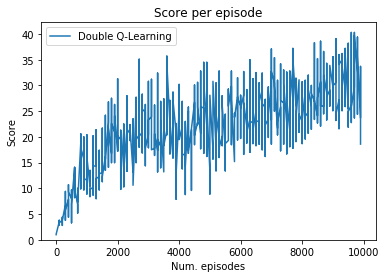

avergae score is 33.61666666666667
high score is 75
The running time was 889.5813102722168


In [44]:
#Double Q needs slight variation of couple functions because you have two Q tables
def choose_double_action(epsilon,s,Q1,Q2):
    #epsilon greedy
    if (random.uniform(0,1) > epsilon):
        #exploit
        q_sum = Q1[s] + Q2[s]
        a = np.argmax(q_sum)
        return a
    else:
        #explore
        a = random.randint(0,3)
        return a

def evaluate_double_Score(Q1,Q2, boardDim, epoch):
    cutoff = 1000  # X moves without increasing score will cut off this game run
    scores = []
    # we will run the game epoch amount of times and then get the average and max 
    for _ in range(epoch):
        game = SnakeGame(boardDim[0], boardDim[1])
        s = game.calcStateNum()
        
        score = 0
        old_score = 0
        stop = False
        moveCounter = 0
        while stop != True:
            Q = Q1 + Q2
            a = np.argmax(Q[s])
            s, r, stop, score = game.makeMove(a)
            #stop the game if score does not improve n amount of times.
            if score == old_score:
                moveCounter += 1
            else:
                old_score = score
                moveCounter = 0
            if moveCounter >= cutoff:
                # stuck going back and forth
                break
        scores.append(score)
    return np.average(scores), scores

def double_Q_learning(episodes,epsilon,alpha,gamma,grid_size):
    #256 possible states (state represented as 8 bit boolean list), 4 possible actions
    Q1 = np.zeros((2**8, 4)) #two Q tables
    Q2 = np.zeros((2**8, 4))
    start = time.time()
    x_axis = []
    results = []

    for i in range(episodes):
        #SnakeGame uses arguments width, height. It also randomizes the food location while starting location is the same
        game = SnakeGame(grid_size[0], grid_size[1])
        s = game.calcStateNum()
        stop = False

        while stop != True:
            a = choose_double_action(epsilon,s,Q1,Q2)
            next_s, r, stop, length = game.makeMove(a)
            if (random.uniform(0,1) > 0.5):
                best_a = np.argmax(Q1[next_s])
                Q1[s][a] = Q1[s][a] + alpha*(r + gamma*Q2[next_s][best_a] - Q1[s][a])
            else:
                best_a = np.argmax(Q2[next_s])
                Q2[s][a] = Q2[s][a] + alpha*(r + gamma*Q1[next_s][best_a] - Q2[s][a])

            s = next_s
            if i % 100 == 0:
                x_axis.append(i)
                results.append(evaluate_double_Score(Q1,Q2, grid_size, 10)[0])

    score = evaluate_double_Score(Q1,Q2, grid_size, 300)
    high_score = max(score[1])
    plot_results(x_axis, results, "Double Q-Learning")
    print('avergae score is',score[0])
    print('high score is',high_score)
    print("The running time was", time.time() - start)

double_Q_learning(episodes = 10000,epsilon= 0.2,alpha= 0.4,gamma = 0.9,grid_size = [20,20])


In [24]:
def visited_state(visited,s,a):
    if s in visited:
        actions = visited[s]
        if a not in actions:
            actions.append(a)
    else:
        visited[s] = [a]
    return visited

def dyna_Q_learning(episodes,epsilon,alpha,gamma,grid_size):
    n = 5000
    #256 possible states (state represented as 8 bit boolean list), 4 possible actions
    Q = np.zeros((2**8, 4))
    model = np.zeros((2**8, 4), dtype = object)
    start = time.time()
    count = 0 

    for _ in range(episodes):
        #SnakeGame uses arguments width, height. It also randomizes the food location while starting location is the same
        game = SnakeGame(grid_size[0], grid_size[1])
        s = game.calcStateNum()
        stop = False
        visited = {}
        count +=1
        while stop != True:
            a = choose_action(epsilon,s,Q)
            next_s, r, stop, length = game.makeMove(a)
            best_a = np.argmax(Q[next_s])
            Q[s][a] = Q[s][a] + alpha*(r + gamma*Q[next_s][best_a] - Q[s][a])
            model[s][a] = np.array([r,next_s])
            #store visited states and action to use in planning
            visited = visited_state(visited,s,a)
            # print(count)
            # print('state is',s,'action is',a)
            # print('visited is',visited)
            for i in range(n):
                #random previously observed state and action taken in the state
                s,actions = random.choice(list(visited.items()))
                a = random.choice(actions)
                r,next_s_ = model[s][a]
                best_a = np.argmax(Q[next_s_])
                Q[s][a] = Q[s][a] + alpha*(r + gamma*Q[next_s_][best_a] - Q[s][a])

            s = next_s
        if count % 1000 == 0:
            print(count)
    #get_path(Q,s,grid_size)
    score = evaluateScore(Q, grid_size, 50)
    print(score[0])
    print("The running time was", time.time() - start)



dyna_Q_learning(episodes = 10000,epsilon= 0.2,alpha= 0.4,gamma = 0.9,grid_size = [10,10])

KeyboardInterrupt: 